# Relatório de Estatística Descritiva: Titanic (D1) e Eleições (D2)

**Aluno:** Carlos Emanuel de Sousa Silva  
**Matrícula:** 2528049  
**Data:** 27/12/2025  
**Disciplina:** Estatística Descritiva  
**Professor:** Hygor Piaget M. Melo

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual para os gráficos
sns.set(style="whitegrid")
%matplotlib inline 

# Leitura dos datasets
df_titanic = pd.read_csv("titanic.csv")
df_eleicoes = pd.read_csv("eleicoes.csv", sep=",")

# Padronização do dataset de Eleições
df_eleicoes.columns = ["UF", "Candidate_Number", "Money", "Votes"]
df_eleicoes["UF"] = df_eleicoes["UF"].str.strip()
df_eleicoes["Money"] = df_eleicoes["Money"].astype(float)
df_eleicoes["Votes"] = df_eleicoes["Votes"].astype(int)

##  Análise do Dataset: Titanic (D1)

Nesta seção, analisamos o perfil dos passageiros. As variáveis são:
* **Qualitativas:** Sex (Sexo), Survived (Sobrevivência), Pclass (Classe).
* **Quantitativas:** Age (Idade) e Fare (Tarifa).

C:\Users\carlo\AppData\Local\Temp\ipykernel_17212\3041485641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, palette='viridis')


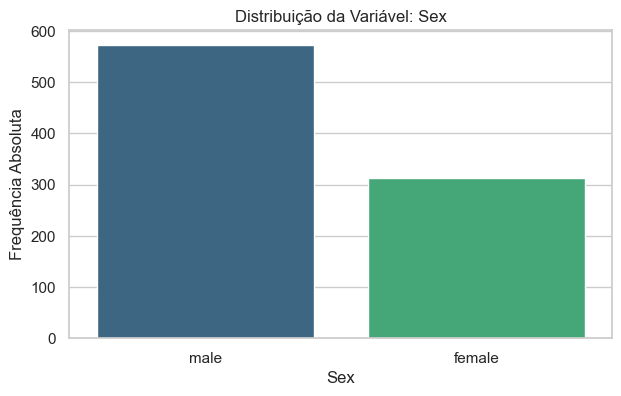

C:\Users\carlo\AppData\Local\Temp\ipykernel_17212\3041485641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, palette='viridis')


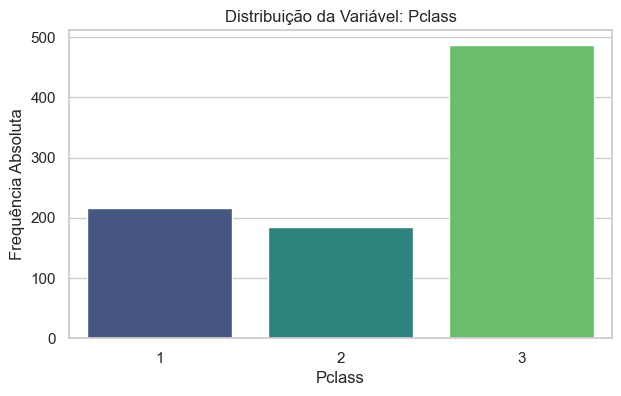

C:\Users\carlo\AppData\Local\Temp\ipykernel_17212\3041485641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, palette='viridis')


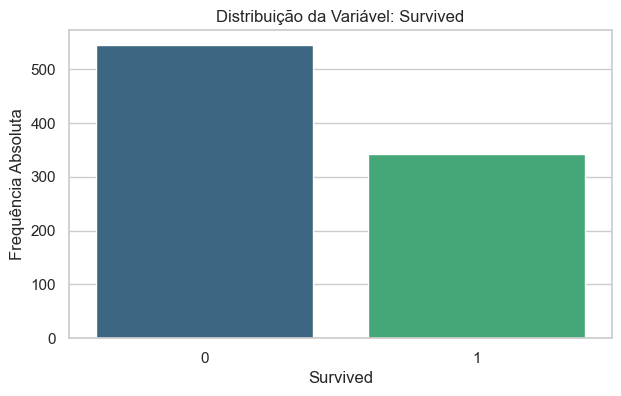

In [23]:
colunas_qualitativas = ['Sex', 'Pclass', 'Survived']

for col in colunas_qualitativas:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df_titanic, palette='viridis')
    plt.title(f"Distribuição da Variável: {col}")
    plt.ylabel("Frequência Absoluta")
    plt.show()

Os **gráficos de barras** mostram que a **moda** da amostra é composta por passageiros do sexo masculino, da 3ª classe e de não sobreviventes. Isso ajuda a descrever a composição demográfica predominante no desastre.

In [24]:
# Tendência Central e Dispersão
estatisticas_quant = df_titanic[['Age', 'Fare']].agg(['mean', 'median', 'std', 'min', 'max'])
print("--- MEDIDAS DE TENDÊNCIA CENTRAL E DISPERSÃO ---")
display(estatisticas_quant)

# Medidas Separatrizes para Age
percentis_age = df_titanic['Age'].quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("\n--- MEDIDAS SEPARATRIZES (AGE) ---")
display(percentis_age.to_frame(name="Valor"))

--- MEDIDAS DE TENDÊNCIA CENTRAL E DISPERSÃO ---


,Age,Fare
mean,29.471443,32.30542
median,28.000000,14.45420
std,14.121908,49.78204
min,0.420000,0.00000
max,80.000000,512.32920



--- MEDIDAS SEPARATRIZES (AGE) ---


,Valor
0.10,14.80
0.25,20.25
0.50,28.00
0.75,38.00
0.90,49.00


A variável Fare apresenta um **desvio padrão** muito superior à sua média, indicando alta **dispersão** e desigualdade nos preços. Já a variável Age apresenta média e mediana próximas, sugerindo baixa **assimetria**.
As **medidas separatrizes** mostram que 10% dos passageiros (Percentil 10) tinham menos de 14 anos.

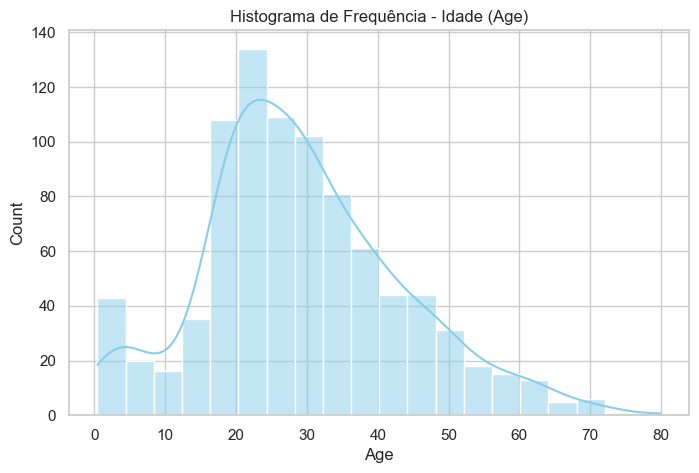

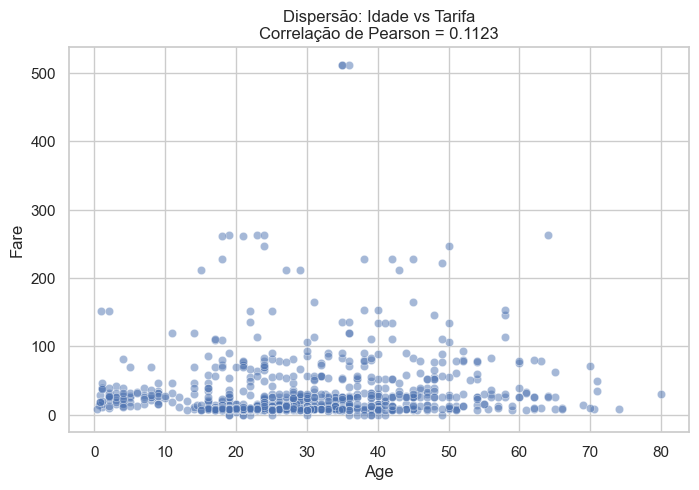

In [25]:
# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_titanic['Age'], bins=20, kde=True, color='skyblue')
plt.title("Histograma de Frequência - Idade (Age)")
plt.show()

# Dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df_titanic, alpha=0.5)
corr_age_fare = df_titanic['Age'].corr(df_titanic['Fare'])
plt.title(f"Dispersão: Idade vs Tarifa\nCorrelação de Pearson = {corr_age_fare:.4f}")
plt.show()

## Análise do Dataset: Eleições (D2)

Diferente do Titanic, este dataset apresenta dados com extrema amplitude, exigindo o uso de **escala logarítmica** para visualização adequada das distribuições e correlações.

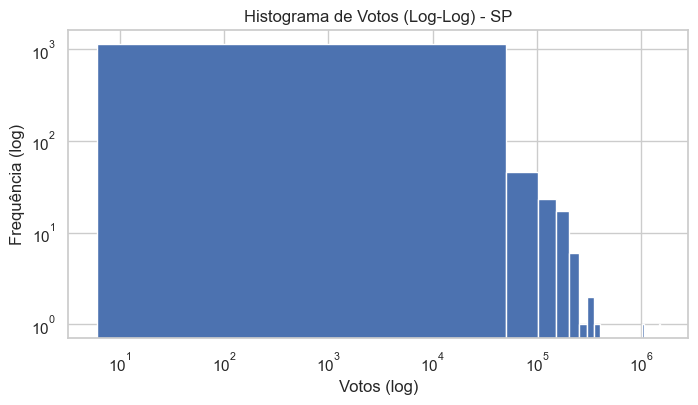

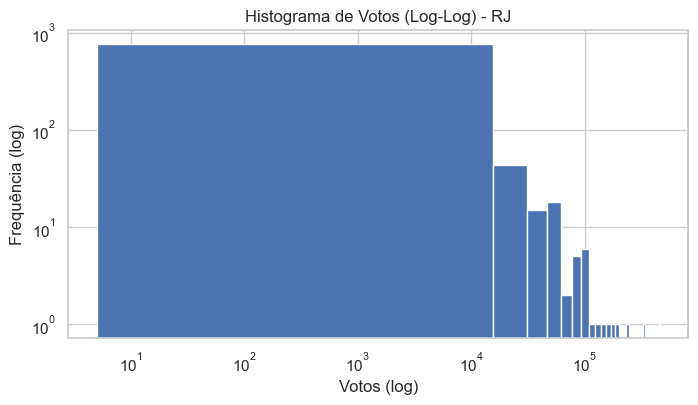

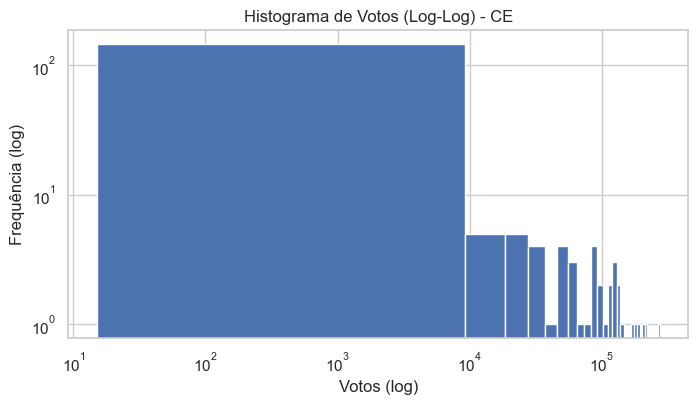

In [26]:
estados = ["SP", "RJ", "CE"]

for uf in estados:
    dados_votos = df_eleicoes[(df_eleicoes["UF"] == uf) & (df_eleicoes["Votes"] > 0)]
    
    plt.figure(figsize=(8, 4))
    plt.hist(dados_votos["Votes"], bins=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Histograma de Votos (Log-Log) - {uf}")
    plt.xlabel("Votos (log)")
    plt.ylabel("Frequência (log)")
    plt.show()

O uso da **escala logarítmica** revela uma forte **assimetria positiva**. Há uma grande **concentração** de candidatos com poucos votos e uma "cauda longa" que representa candidatos com votações expressivas (**valores extremos/outliers**).

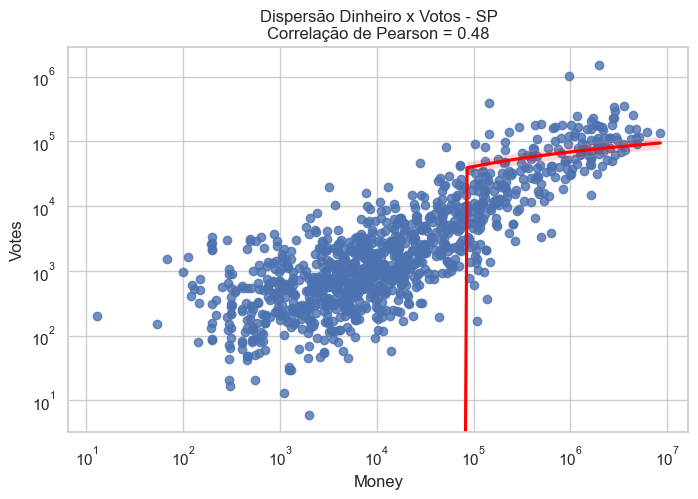

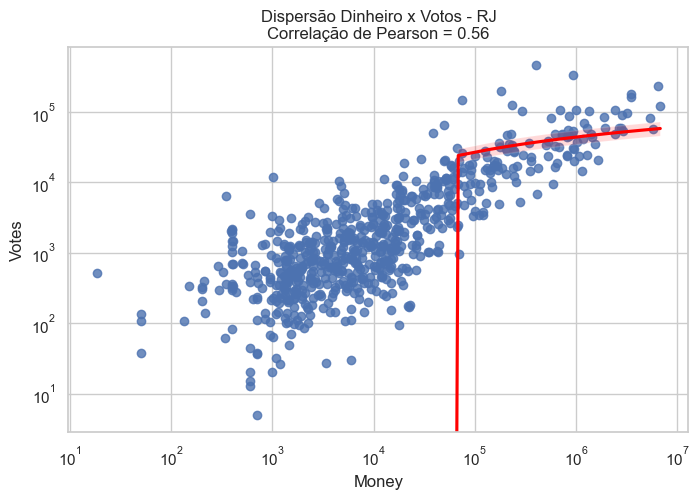

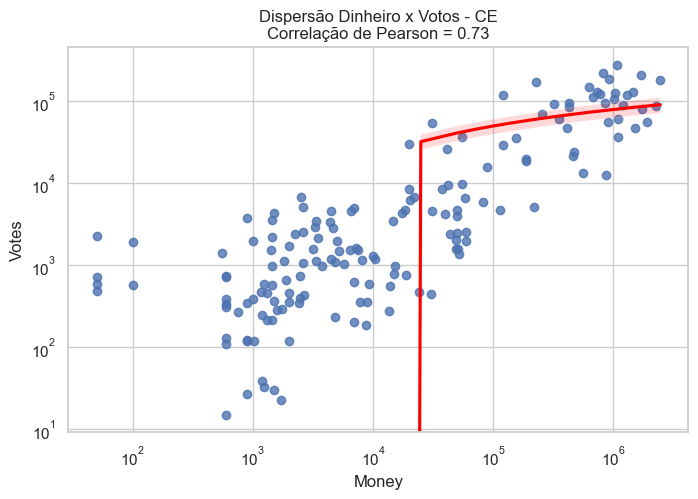

In [27]:
for uf in estados:
    dados = df_eleicoes[(df_eleicoes["UF"] == uf) & (df_eleicoes["Money"] > 0) & (df_eleicoes["Votes"] > 0)]
    corr = dados["Money"].corr(dados["Votes"])
    
    plt.figure(figsize=(8, 5))
    sns.regplot(x="Money", y="Votes", data=dados, logx=True, line_kws={'color': 'red'})
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Dispersão Dinheiro x Votos - {uf}\nCorrelação de Pearson = {corr:.2f}")
    plt.show()

Observa-se uma **correlação de Pearson** positiva moderada a forte. O padrão visual no gráfico de dispersão indica que, em escala logarítmica, o aumento de investimento financeiro está linearmente associado ao aumento de votos.

In [28]:
# Correlação por Estado
correlacao_uf = df_eleicoes[(df_eleicoes["Money"] > 0) & (df_eleicoes["Votes"] > 0)].groupby("UF", group_keys=False).apply(lambda x: x["Money"].corr(x["Votes"]))
print("--- CORRELAÇÃO POR ESTADO ---")
display(correlacao_uf.to_frame(name="Correlação"))

# Medidas de Tendência Central e Dispersão por UF
resumo_estados = df_eleicoes.groupby("UF").agg({
    "Votes": ["mean", "median", "std", "min", "max", lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    "Money": ["mean", "median", "std", "min", "max", lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
})
print("\n--- RESUMO DE MEDIDAS POR ESTADO ---")
display(resumo_estados)

--- CORRELAÇÃO POR ESTADO ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_17212\2885352229.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlacao_uf = df_eleicoes[(df_eleicoes["Money"] > 0) & (df_eleicoes["Votes"] > 0)].groupby("UF", group_keys=False).apply(lambda x: x["Money"].corr(x["Votes"]))


,Correlação
UF,
AC,0.701884
AL,0.829230
AM,0.902386
AP,0.559548
BA,0.674216
CE,0.726408
ES,0.816940
GO,0.605071
MA,0.654211



--- RESUMO DE MEDIDAS POR ESTADO ---


Votes                                                           \
            mean  median           std min      max <lambda_0> <lambda_1>   
UF                                                                          
AC   5940.838710  1645.0   8310.838754   5    39844     354.50   10203.50   
AL  11456.428571  1021.0  27397.363666   0   135929     114.25    4855.25   
AM  19501.062500  1051.5  43379.500525   0   250916     384.00    5804.00   
AP   3376.706422   886.0   5093.796042   0    22134     202.00    4818.00   
BA  18183.498480   988.0  37929.692251   0   222164     174.00    6268.00   
CE  19912.895522  1184.0  45729.122601   0   277774     355.00    6327.00   
ES  10154.128049  1116.0  23068.114794   0   161744     333.75    4730.00   
GO  19613.395833   349.0  42725.962725   0   274625       0.00    4804.25   
MA  11770.904564   971.0  25098.154391   0   133575     246.00    5997.00   
MG  14512.475743   972.0  37704.171995   0   310226     310.00    4198.00   
MS   9867.403361  1468.0  23458.951447   0   160556     441.00    4696.00   
MT  12475.336449   940.0  27059.615498   0   127749      79.00    7841.00   
PA  19004.152174  1406.5  40028.322224   0   265983     269.75   14371.75   
PB  17383.450980  1192.5  38520.365114   0   179886     144.25    7195.25   
PE  25969.477987  2542.0  49398.973115   0   283567     288.00   20970.00   
PI  15874.770000   584.0  34445.090049   0   134157     170.50    2219.50   
PR  17241.437908  1149.5  38218.001705   0   200144     350.25    9013.50   
RJ   7056.904096   715.0  26267.580593   0   464572     214.00    2924.00   
RN  16126.011111  1436.5  38557.779707   0   191064     319.25    5838.00   
RO   8820.523810  2902.5  13737.634801   0    61419     646.25    9255.00   
RR   2785.567901   485.0   5530.963257   0    35555      86.00    3358.00   
RS  17409.344937  1326.5  36639.883068   0   162462     431.75    9195.75   
SC  23819.061069  2596.0  47023.344925   0   229668     673.00   15519.00   
SE  12178.887500   749.0  25684.583368   0   131236     126.00    4694.75   
SP  13982.692815   873.0  61060.430334   0  1524361     251.00    4095.50   
TO  13976.958333   699.0  20914.557184   0    75934     283.50   26567.00   

            Money                                                        \
             mean     median           std  min         max  <lambda_0>   
UF                                                                        
AC  136779.967258  31257.000  2.044476e+05  0.0   736866.25   3486.9500   
AL  164481.874107   4472.465  4.233699e+05  0.0  2281353.43    900.0000   
AM  292684.082000   4153.985  8.169442e+05  0.0  5633092.26    815.6250   
AP   77839.726514   6187.400  2.447173e+05  0.0  2060000.00   1300.0000   
BA  220278.106201   2651.360  6.521565e+05  0.0  5979037.10      0.0000   
CE  173327.914577   3748.400  4.244131e+05  0.0  2476971.70    892.3600   
ES  118846.429207   8789.375  3.101784e+05  0.0  2233581.69   1491.8150   
GO  452396.188333   2526.720  1.091613e+06  0.0  5812787.78    617.6700   
MA   87956.994481   1200.000  2.584183e+05  0.0  2407218.09      0.0000   
MG  251171.666823   6000.000  7.383497e+05  0.0  4953956.39   1184.1800   
MS  246928.455042  35833.170  6.101285e+05  0.0  4298808.34  19742.2500   
MT  254017.291963  14963.000  6.857446e+05  0.0  3860361.98   1448.0000   
PA  104454.693913   5748.940  2.239573e+05  0.0  1342770.20    976.0100   
PB  138160.763529   5397.070  3.633466e+05  0.0  2224506.83    480.0000   
PE  323947.652075   6390.000  6.908665e+05  0.0  3823108.01    400.0000   
PI  248986.270700   5100.000  8.430980e+05  0.0  6722540.86   1465.5000   
PR  227424.993987   6857.995  6.311344e+05  0.0  4779912.90   1654.6300   
RJ  110673.541748   3324.000  5.114521e+05  0.0  6788349.32    675.5000   
RN  157543.258667   3336.450  4.207897e+05  0.0  2537947.64   1373.1500   
RO  201988.403690  36437.860  4.088371e+05  0.0  2586062.83   1600.0000   
RR  103192.759012  11604.880  3.001196e+05  0.0  240